In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

In [5]:
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [6]:
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [7]:
data = pd.concat([exercise,calories.Calories],axis=1)
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [10]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Visualization

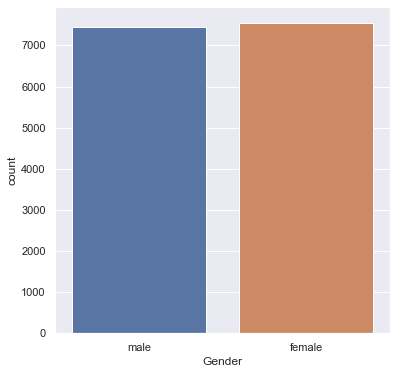

In [11]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=data.Gender)
plt.show()

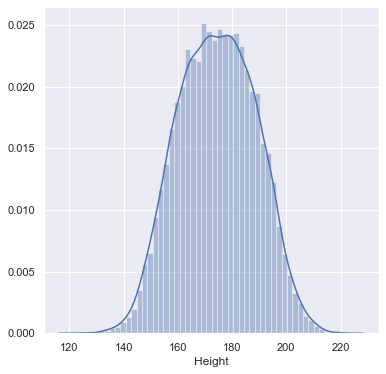

In [12]:
plt.figure(figsize=(6,6))
X=data.Height
sns.distplot(X)
plt.show()

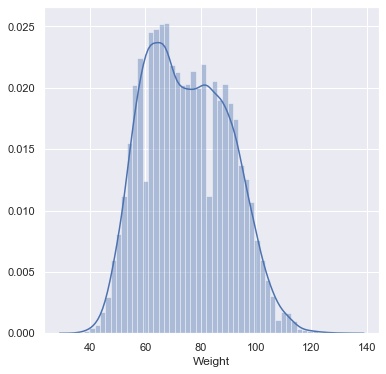

In [13]:
plt.figure(figsize=(6,6))
x=data.Weight
sns.distplot(x)
plt.show()

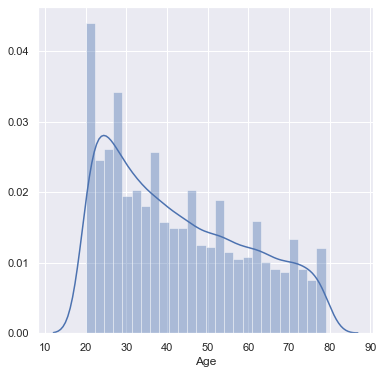

In [14]:
plt.figure(figsize=(6,6))
x=data.Age
sns.distplot(x)
plt.show()

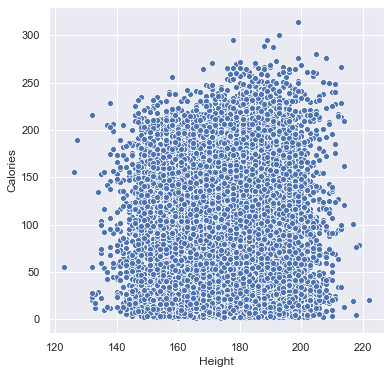

In [15]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=data.Height,y=data.Calories)
plt.show()

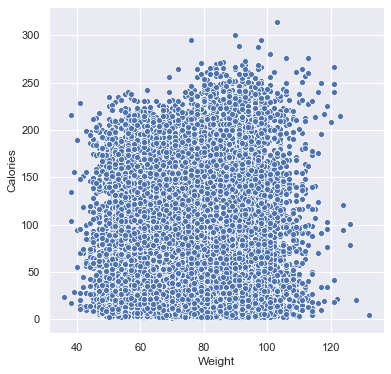

In [16]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=data.Weight,y=data.Calories)
plt.show()

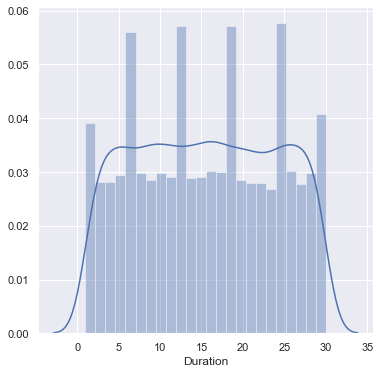

In [17]:
plt.figure(figsize=(6,6))
x=data.Duration
sns.distplot(x)
plt.show()

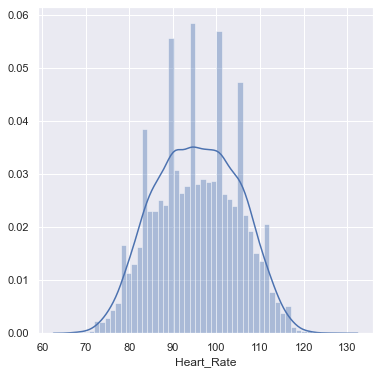

In [18]:
plt.figure(figsize=(6,6))
x=data.Heart_Rate
sns.distplot(x)
plt.show()

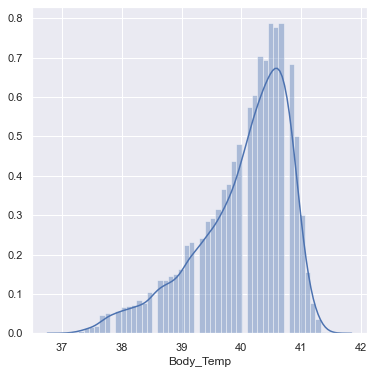

In [19]:
plt.figure(figsize=(6,6))
x=data.Body_Temp
sns.distplot(x)
plt.show()

In [20]:
data.corr()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


Model Training 
1. Model with only duration
2. Model with all the relevant columns
3. Model with all the columns

In [21]:
X = data.drop(['User_ID','Gender','Age','Height','Weight','Heart_Rate','Body_Temp','Calories'],axis=1,index=None)
y = data.drop(['User_ID','Gender','Age','Height','Weight','Heart_Rate','Body_Temp','Duration'],axis=1)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X_train.shape,X_test.shape

((12000, 1), (3000, 1))

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
pred = lr.predict(X_train)
score = metrics.r2_score(y_train,pred)
score

0.9123562018290068

In [26]:
pred1 = lr.predict(X_test)
score1 = metrics.r2_score(y_test,pred1)
score1

0.9145047527249381

In [27]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred = dt.predict(X_train)
score = metrics.r2_score(y_train,pred)
score

0.9282248617533129

In [28]:
pred1 = dt.predict(X_test)
score1 = metrics.r2_score(y_test,pred1)
score1

0.931790696825987

In [29]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred = rf.predict(X_train)
score = metrics.r2_score(y_train,pred)
score

<ipython-input-29-dbe3c0146466>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.9282229916021429

In [30]:
pred1 = rf.predict(X_test)
score1 = metrics.r2_score(y_test,pred1)
score1

0.9318020481027557

In [31]:
X = data.drop(['User_ID','Gender','Age','Height','Weight','Calories'],axis=1,index=None)
y = data.drop(['User_ID','Gender','Age','Height','Weight','Duration'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((12000, 3), (3000, 3))

In [32]:
lr.fit(X_train,y_train)
pred = lr.predict(X_train)
score = metrics.r2_score(y_train,pred)
score

0.9820610670750405

In [33]:
pred1 = lr.predict(X_test)
score1 = metrics.r2_score(y_test,pred1)
score1

0.9821528310671884

In [34]:
dt.fit(X_train,y_train)
pred1 = dt.predict(X_test)
score1 = metrics.r2_score(y_test,pred1)
score1

0.9787503792986628

In [35]:
rf.fit(X_train,y_train)
pred1 = rf.predict(X_test)
score1 = metrics.r2_score(y_test,pred1)
score1

0.9827685075960657

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Gender = le.fit_transform(data.Gender)
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0


In [37]:
X = data.drop(['User_ID','Calories'],axis=1,index=None)
y = data.drop(['User_ID','Duration'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((12000, 7), (3000, 7))

In [38]:
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
score = metrics.r2_score(y_test,pred)
score

0.9953276735893899

In [39]:
dt.fit(X_train,y_train)
pred1 = dt.predict(X_test)
score1 = metrics.r2_score(y_test,pred1)
score1

0.887945583791743

In [40]:
rf.fit(X_train,y_train)
pred1 = rf.predict(X_test)
score1 = metrics.r2_score(y_test,pred1)
score1

0.9552748591996549

In [41]:
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0


In [42]:
data['BMI'] = data['Weight'] / (data['Height'] / 100) ** 2
print(data.head())

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363       1   68   190.0    94.0      29.0       105.0       40.8   
1  14861698       0   20   166.0    60.0      14.0        94.0       40.3   
2  11179863       1   69   179.0    79.0       5.0        88.0       38.7   
3  16180408       0   34   179.0    71.0      13.0       100.0       40.5   
4  17771927       0   27   154.0    58.0      10.0        81.0       39.8   

   Calories        BMI  
0     231.0  26.038781  
1      66.0  21.773842  
2      26.0  24.655910  
3      71.0  22.159109  
4      35.0  24.456063  


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Calories', axis=1), data['Calories'], test_size=0.2)

# create a KNN classifier object with K=5
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model to the training data
knn.fit(X_train, y_train)

# make predictions on the testing data
y_pred = knn.predict(X_test)

# evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.007666666666666666


In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np

# encode the categorical variable "Gender" as numeric values
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# split the dataset into features and target variable
X = data.drop(['User_ID', 'BMI'], axis=1)
y = data['BMI']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# scale the features using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create a KNN regression model object with K=5
knn = KNeighborsRegressor(n_neighbors=5)

# fit the model to the training data
knn.fit(X_train, y_train)

# make predictions on the testing data
y_pred = knn.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.5839557400888554


Mean Squared Error: 0.12443931088691432


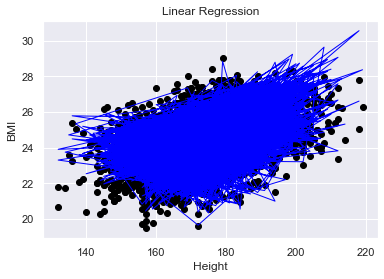

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# split the dataset into features and target variable
X = data.drop(['User_ID', 'BMI'], axis=1)
y = data['BMI']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create a linear regression model object
linear_reg = LinearRegression()

# fit the model to the training data
linear_reg.fit(X_train, y_train)

# make predictions on the testing data
y_pred = linear_reg.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# plot the regression line on the scatter plot
plt.scatter(X_test['Height'], y_test, color='black')
plt.plot(X_test['Height'], y_pred, color='blue', linewidth=1)
plt.xlabel('Height')
plt.ylabel('BMI')
plt.title('Linear Regression')
plt.show()


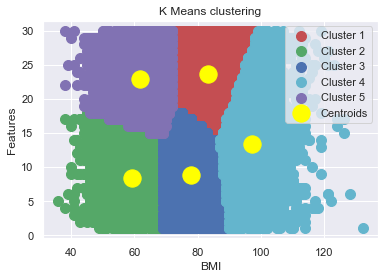

In [46]:
import numpy as np
import random
import matplotlib.pyplot as plt

X = data.iloc[:, [4,5,9 ]].values

# Define the number of clusters
K = 5

# Initialize the centroids
centroids = X[random.sample(range(len(X)), K)]

# KMeans algorithm
max_iterations = 100
for i in range(max_iterations):
    # Assign each point to the nearest centroid
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    labels = np.argmin(distances, axis=0)

    # Update the centroids
    for j in range(K):
        centroids[j] = np.mean(X[labels == j], axis=0)

    # Check if the centroids have converged
    if i > 0 and np.array_equal(old_centroids, centroids):
        break
    old_centroids = centroids.copy()

# Visualize the clusters
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(K):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s = 100, c = colors[i], label = f'Cluster {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title("K Means clustering")
plt.xlabel("BMI")
plt.ylabel("Features")
plt.legend()
plt.show()